# Examples and exercises

## Environment



#### 3.2.2.4 

Figure 3-3

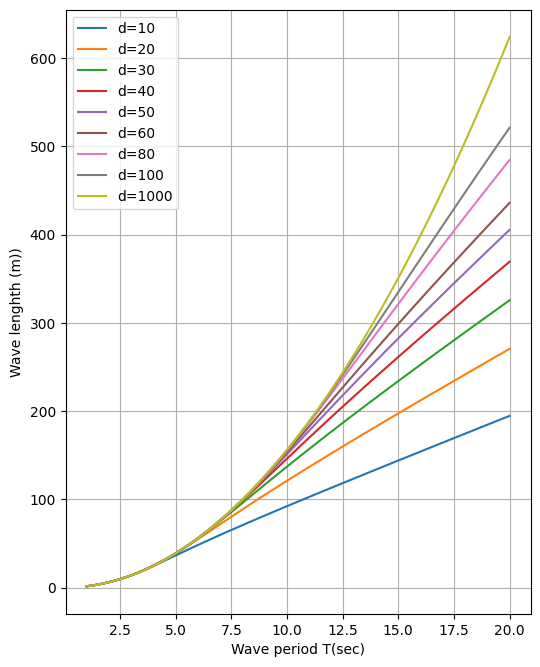

In [2]:
#### 3.2.2.4 Approximation for the wave length 
import numpy as np
import matplotlib.pyplot as plt



def waveLengthApprox(T,d):
    ### T is wave period, d is water depth
    g = 9.8
    Lambda_0 = g / (2* np.pi) * T**2
    k_0 = 2 * np.pi / Lambda_0
    xi_0 = np.sqrt(k_0 * d)*(1 + k_0* d/ 6 + (k_0* d)**2 / 30)
    Lambda = Lambda_0 * np.tanh(xi_0)
    return Lambda

fig = plt.figure(figsize=(6, 8), dpi=100)

ax = fig.add_subplot(1,1,1)
depth = np.array([10,20,30,40,50,60,80,100,1000])
WavePeriod = np.linspace(1, 20,100)
wavelengths = []
for d in depth:
    wavelengths.append(waveLengthApprox(WavePeriod, d))
for i in range(depth.size):
    plt.plot(WavePeriod,wavelengths[i],label = f"d={depth[i]}")

ax.set_xlabel('Wave period T(sec)')
ax.set_ylabel('Wave lenghth (m))')
ax.grid()

ax.legend()
plt.show()

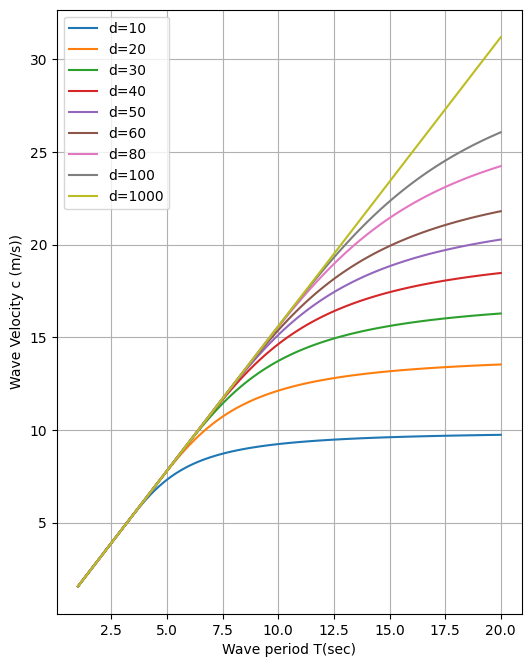

In [3]:
fig = plt.figure(figsize=(6, 8), dpi=100)
ax = fig.add_subplot(1,1,1)

depth = np.array([10,20,30,40,50,60,80,100,1000])
WavePeriod = np.linspace(1, 20,100)
wavelengths = []
for d in depth:
    wavelengths.append(waveLengthApprox(WavePeriod, d))
for i in range(depth.size):
    plt.plot(WavePeriod,wavelengths[i]/WavePeriod,label = f"d={depth[i]}")
ax.legend()
ax.set_xlabel('Wave period T(sec)')
ax.set_ylabel('Wave Velocity c (m/s))')
plt.grid()
plt.show()

## [pywafo](https://github.com/wafo-project/pywafo) : Wave Analysis for Fatigue and Oceanography

Installation: very frustrating process. Python package management, especially for the older packages, is really tricky.

Highly recommend Linux(WSL) or Mac OS environment. Compling on Windows is terrible.

0. C++ and fortran compiler installation: GCC and Gfortran

1. Create conda env for wafo compiling. Python 3.6 is recommended. Newer versions may encounter different compling issues.
   
   ```shell 
   conda create -n wafocomile python=3.6
   ```

2. Clone repository
   ```shell 
   git clone https://github.com/wafo-project/pywafo.git
   ```
   
3. Setup environement
      ```shell
      cd pywafo

      pip install -r requirements.txt
      ```

4. Manually install some test libraries.
   
   ```shell
   conda install pytest -c conda-forge
   ```
5. Compile
   ```shell
       python setup.py bdist_wheel -d dist
   ```
6. Install
   ```shell
       pip install dist/wafo-X.Y.Z+abcd123-os_platform.whl
   ```
7. Test in python
    ```python
    import wafo as wf
    wf.test()
    ```


### The following scripts are based on WAFO [tutorial scripts](https://github.com/wafo-project/pywafo/tree/master/src/wafo/doc/tutorial_scripts). 

Please refer to [WAFO Tutorial 2017](http://www.maths.lth.se/matstat/wafo/Wafo_tutorial_2017.pdf) for details.

### Simulation from spectrum

Text(0.5, 1.0, 'Torsethaugen & JONSWAP Spectral Density')

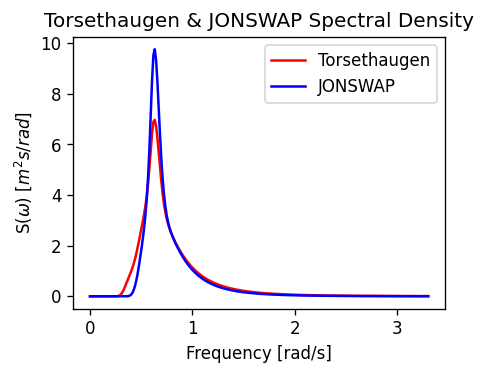

In [38]:
# Warnings may pop up, be cautious

fig = plt.figure(figsize=(4, 3), dpi=120)
ax = fig.add_subplot(1,1,1)

import wafo.spectrum.models as wsm
TS = wsm.Torsethaugen(Hm0=6, Tp=10)
TSdata = TS.tospecdata()
TSplot = TSdata.plot(c='r', ls='-', lw=1.5)
JS= wsm.Jonswap(Hm0=6, Tp=10)
JSdat = JS.tospecdata()
JSplot = JonswapS1.plot(c='blue', ls='-', lw=1.5)
plt.legend(['Torsethaugen','JONSWAP'])
plt.title('Torsethaugen & JONSWAP Spectral Density')

### Simulation from spectrum

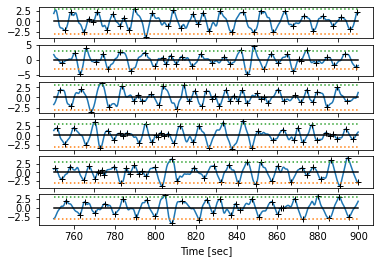

In [40]:
import wafo.objects as wo
xs = TSdata.sim(ns=9000, dt=0.1) #(15 minutes)
ts = wo.mat2timeseries(xs)
h=ts.plot_wave('-')

### Estimate spectrum from time series

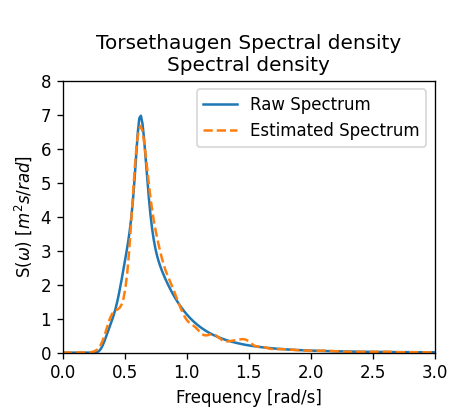

In [48]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(4, 3), dpi=120)
ax = fig.add_subplot(1,1,1)

#Fs = 4;  
#xs = S1.sim(ns=int(20 * 60 * Fs), dt=1. / Fs) 
#ts = wo.mat2timeseries(xs) 
Sest = ts.tospecdata(L=800)
TSdata.plot()
Sest.plot('--')
plt.axis([0, 3, 0, 8]) # This may depend on the simulation

plt.legend(['Raw Spectrum','Estimated Spectrum'])

## Probability distributions of wave characteristics

From Wafo example.

(0.0, 10.0, 0.0, 0.35)

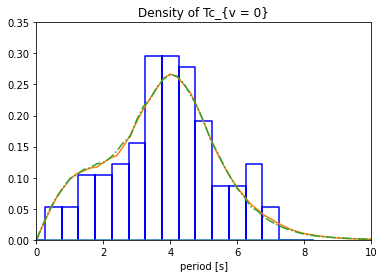

In [54]:
import wafo.misc as wm
dtyex = TSdata.to_t_pdf(pdef='Tt', paramt=(0, 10, 51), nit=3)
dtyest = Sest.to_t_pdf(pdef='Tt', paramt=(0, 10, 51), nit=3)

T, index = ts.wave_periods(vh=0, pdef='d2u')
bins = wm.good_bins(T, num_bins=25, odd=True)
wm.plot_histgrm(T, bins=bins, density=True)

dtyex.plot()
dtyest.plot('-.')
plt.axis([0, 10, 0, 0.35])
